In [34]:
!pip install nltk

In [0]:
import nltk

In [0]:
from nltk.tokenize import sent_tokenize

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [38]:
text_sent = "Hello world. It's good to see you. Thaks for buying this book."
print(sent_tokenize(text_sent))

['Hello world.', "It's good to see you.", 'Thaks for buying this book.']


In [39]:
text_sent = "IP is 192.168.152.1. Since I'm actively looking for Ph.D. students."
print(sent_tokenize(text_sent)) # .단위로 한것은 아니다. (예외처리를 해준다.)

['IP is 192.168.152.1.', "Since I'm actively looking for Ph.D. students."]


In [0]:
from nltk.tokenize import word_tokenize

In [41]:
text_sent = "Hello world. It's good to see you. Thaks for buying this book."
word_tokenize(text_sent)

['Hello',
 'world',
 '.',
 'It',
 "'s",
 'good',
 'to',
 'see',
 'you',
 '.',
 'Thaks',
 'for',
 'buying',
 'this',
 'book',
 '.']

In [42]:
text_word = "I can't"
word_tokenize(text_word)

['I', 'ca', "n't"]

In [0]:
from nltk.tokenize import WordPunctTokenizer
tokenizer = WordPunctTokenizer()

In [44]:
text_punc =  "Hello world. It's good to see you. Thaks for buying this book. I can't"
print(tokenizer.tokenize(text_punc))

['Hello', 'world', '.', 'It', "'", 's', 'good', 'to', 'see', 'you', '.', 'Thaks', 'for', 'buying', 'this', 'book', '.', 'I', 'can', "'", 't']


### Normalization
- Cleaning(정제)  
갖고있는 corpus로부터 noisy를 제거.  
US vs us. / 대소문자 앞부분 통일 등.  
등장 빈도 적은 단어 제거  
길이가 짧은 단어 (a, it, to, on, in, by 등 제거), 한국어는 적용이 좀 힘듦.

### Lemmatization(표제어 추출)

품사 정보가 보존된 형태의 기본형으로 변환.

cats -> cat + s  
dies -> die  
watched -> watch  
Has -> have  


### Stemming(어간 추출)

formalize -> formal
allowance -> allow
electricical -> electric

In [45]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

word = ["doing",'policy','have','going','dies','has','watched']

for _ in word:

  print(lemma.lemmatize(_))

doing
policy
have
going
dy
ha
watched


In [47]:
# lemmatize는 품사정보를 포함하고 있다.
# nltk로 안되는 것들 한다.

lemma = WordNetLemmatizer()

lemma.lemmatize('has','v')
lemma.lemmatize('watched','v')
lemma.lemmatize('am','v')

'be'

In [49]:
text_word =  "Hello world. It's good to see you. Thaks for buying this book."
print(text_word.lower())
print(text_word.upper())

hello world. it's good to see you. thaks for buying this book.
HELLO WORLD. IT'S GOOD TO SEE YOU. THAKS FOR BUYING THIS BOOK.


### 정규식

In [0]:
import re

In [76]:
r = re.compile("ab{2,8}c")


r.search("abbbbbbbbc")

<_sre.SRE_Match object; span=(0, 10), match='abbbbbbbbc'>

In [91]:
r = re.compile("ab.")
r.search("sssabc")
r.match("abcsss") # match는 맨 처음 시작을 해야한다.

<_sre.SRE_Match object; span=(0, 3), match='abc'>

In [90]:
text = "사과 복숭아 메론 바나나"
re.split(" ",text)

['사과', '복숭아', '메론', '바나나']

In [99]:
import re
text = """
이름 : 허윤아
전화번호 : 010-3100-0000
성별 : 여자
"""
re.findall("\w+",text)

['이름', '허윤아', '전화번호', '010', '3100', '0000', '성별', '여자']

In [105]:
text = """Regular Expression : A regular or regexp[1]."""
re.sub("[^a-zA-Z]",' ',text)

'Regular Expression   A regular or regexp    '

In [131]:
text = """100 John PROF 101 James STUD 102 Mac STUD"""
re.sub("\b[^a-zA-Z]\b",' ',text)

'100 John PROF 101 James STUD 102 Mac STUD'

In [134]:
text = """100 John PROF 101 James STUD 102 Mac STUD"""
re.findall(r"\b[A-Z][a-z]+\b",text)

['John', 'James', 'Mac']

In [135]:
# 답안
text = """100 John PROF 101 James STUD 102 Mac STUD"""
re.findall(r"[A-Z][a-z]+",text)


['John', 'James', 'Mac']

In [138]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w]+")

print(tokenizer.tokenize("Hello world. It's good to see you. Thaks for buying this book."))

['Hello', 'world', 'It', 's', 'good', 'to', 'see', 'you', 'Thaks', 'for', 'buying', 'this', 'book']


In [141]:
import nltk
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\s]+",gaps = True) # gaps가 True면 찾은걸 기준으로 나눈다.

print(tokenizer.tokenize("Hello world. It's good to see you. Thaks for buying this book."))

['Hello', 'world.', "It's", 'good', 'to', 'see', 'you.', 'Thaks', 'for', 'buying', 'this', 'book.']


In [0]:
Matching : "\W*\b\w{1,2}\b"
Hello world. It's good to see you. Thaks for buying this book

- Lemmatization

> am -> be  
the going -> the going  
having -> have  

- Stemming

> am -> am  
the going -> the go  
having -> hav  
입니다 -> 이다

In [144]:
from nltk.stem import PorterStemmer

stemming = PorterStemmer()

word = ["formalize","allowance","electrical"]

for i in word:
  print(stemming.stem(i))

formal
allow
electr


### Stopword (불용어)

In [149]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
import nltk
from nltk.corpus import stopwords

In [151]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [153]:
example = "Family is not an important thing. It's everything"
for _ in example.split(" "):
  if _ not in stopwords.words('english'):
    print(_)
    

Family
important
thing.
It's
everything


In [0]:
# 답안
from nltk.tokenize import word_tokenize
example = "Family is not an important thing. It's everything"
word_token = word_tokenize(example)

stop_word = set(stopwords.words("english"))

clean_word = []

In [160]:
for i in word_token:
  if i not in stop_word:
    clean_word.append(i)
    
print(clean_word)

['Family', 'important', 'thing', '.', 'It', "'s", 'everything']


In [0]:
# One-hot encoding : 내일 배울 예쩡
# Bag of Words : 단어 마다 index를 부여함.
# TF-IDF : 

## Word Cloud

In [161]:
!pip install matplotlib
!pip install WordCloud

In [0]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [0]:
f = """
From the day we arrive on the planet
And blinking, step into the sun
There's more to see than can ever be seen
More to do than can ever be done
There's far too much to take in here
More to find than can ever be found
But the sun rolling high
Through the sapphire sky
Keeps great and small on the endless round

It's the circle of life
And it moves us all
Through despair and hope
Through faith and love
Till we find our place
On the path unwinding
In the circle
The circle of life
"""

wordcloud = WordCloud().generate(f)

In [166]:
wordcloud.words_ # 단어가 비중이 얼마나 되는지 계산한 것.

{'Keeps': 0.3333333333333333,
 'Till': 0.3333333333333333,
 'arrive': 0.3333333333333333,
 'blinking': 0.3333333333333333,
 'circle': 1.0,
 'day': 0.3333333333333333,
 'despair': 0.3333333333333333,
 'done': 0.3333333333333333,
 'endless': 0.3333333333333333,
 'faith': 0.3333333333333333,
 'far': 0.3333333333333333,
 'find': 0.6666666666666666,
 'found': 0.3333333333333333,
 'great': 0.3333333333333333,
 'high': 0.3333333333333333,
 'hope': 0.3333333333333333,
 'life': 0.6666666666666666,
 'love': 0.3333333333333333,
 'moves': 0.3333333333333333,
 'much': 0.3333333333333333,
 'path': 0.3333333333333333,
 'place': 0.3333333333333333,
 'planet': 0.3333333333333333,
 'rolling': 0.3333333333333333,
 'round': 0.3333333333333333,
 'sapphire': 0.3333333333333333,
 'see': 0.3333333333333333,
 'seen': 0.3333333333333333,
 'sky': 0.3333333333333333,
 'small': 0.3333333333333333,
 'step': 0.3333333333333333,
 'sun': 0.6666666666666666,
 'take': 0.3333333333333333,
 'unwinding': 0.3333333333333333

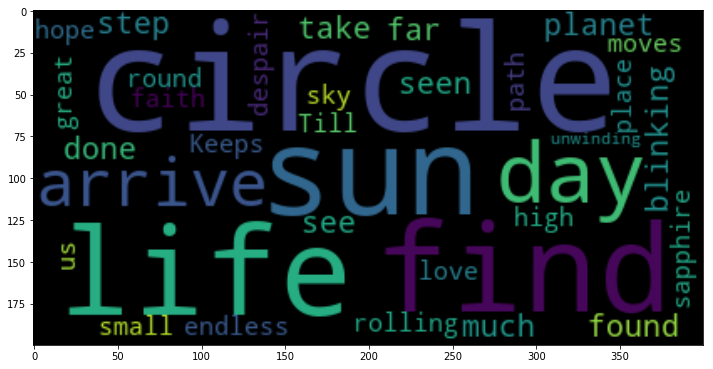

In [190]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation = "bilinear")
#plt.axis('off')

In [0]:
# wordcloud 자체 내에 불용어를 빼준다.

In [186]:
# 답안
from nltk.tokenize import word_tokenize

word_token = word_tokenize(f)
stop_word = set(stopwords.words("english"))

clean_word = []

for i in word_token:
  if i not in stop_word:
    clean_word.append(i)
    
cleanStr =""  

for i in clean_word:
  cleanStr += i + " "
wordcloud2 = WordCloud().generate(cleanStr)
wordcloud2.words_

{'Keeps': 0.3333333333333333,
 'Till': 0.3333333333333333,
 'arrive': 0.3333333333333333,
 'blinking': 0.3333333333333333,
 'circle': 1.0,
 'day': 0.3333333333333333,
 'despair': 0.3333333333333333,
 'done': 0.3333333333333333,
 'endless': 0.3333333333333333,
 'faith': 0.3333333333333333,
 'far': 0.3333333333333333,
 'find': 0.6666666666666666,
 'found': 0.3333333333333333,
 'great': 0.3333333333333333,
 'high': 0.3333333333333333,
 'hope': 0.3333333333333333,
 'life': 0.6666666666666666,
 'love': 0.3333333333333333,
 'moves': 0.3333333333333333,
 'much': 0.3333333333333333,
 'path': 0.3333333333333333,
 'place': 0.3333333333333333,
 'planet': 0.3333333333333333,
 'rolling': 0.3333333333333333,
 'round': 0.3333333333333333,
 'sapphire': 0.3333333333333333,
 'see': 0.3333333333333333,
 'seen': 0.3333333333333333,
 'sky': 0.3333333333333333,
 'small': 0.3333333333333333,
 'step': 0.3333333333333333,
 'sun': 0.6666666666666666,
 'take': 0.3333333333333333,
 'unwinding': 0.3333333333333333

In [0]:
# wordcloud는 가장 많이 나오는걸 1로 잡고 비율 따진 것인지. -> Bag of words, TF-IDF를 기준으로 한 것이다.

### 형태소 분석 실습

- 의미를 갖는 최소 단위. (의미적으로 더이상 분석이 불가능한 단위)
- Twitter, Kkma, Komoran, Hannannum, Mecab (한국어 파이썬 라이브러리)


In [191]:
!apt-get update

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release [564 B]
Get:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release.gpg [833 B]
Get:7 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:8 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease [15.4 kB]
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://cloud.r-project.org/bi

In [192]:
!apt-get install g++ openjdk-8-jdk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
g++ is already the newest version (4:7.4.0-1ubuntu2.3).
g++ set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jre x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jre x11-utils
0 upgraded, 13 newly installed, 0 to remove and 34 not upgraded.
Need to get 6,847 kB of 

In [193]:
!pip install konlpy

     |████████████████████████████████| 19.4MB 4.9MB/s 
     |████████████████████████████████| 2.7MB 32.7MB/s 


In [0]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [199]:
kkma = Kkma()

pprint(kkma.sentences(u"전 치과가보셨음 좋겠어요 신경이 다쳤을수도있고 우선은 치과가서 검사해보는게 맘 놓일것같아요 어린이치과가 좋지만 예약이 많아서 아이가 거부만 안한다면 어른치과도 괜찮을것같아요 빨리 진료볼수있는곳으로 가시는게 어떨까요"))
# sentence별로 끊어줌.

['전 치과가 보셨음 좋겠어요',
 '신경이 다쳤을 수도 있고 우선은 치과가 서 검사해 보는 게 맘 놓일 것 같아요',
 '어린이 치과가 좋지만 예약이 많아서 아이가 거부만 안한다면 어른 치과도 괜찮을 것 같아요',
 '빨리 진료 볼 수 있는 곳으로 가시는 게 어떨까요']


In [200]:
kkma.pos(u"하늘을 나는 자동차")
# 

[('하늘', 'NNG'), ('을', 'JKO'), ('날', 'VV'), ('는', 'ETD'), ('자동차', 'NNG')]

In [0]:
from konlpy.tag import Hannanum
han = Hannanum()

In [206]:
print(han.analyze(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))
# 형태학적 해석에 대한 후보군을 보여줌.

[[[('아버지', 'ncn'), ('가', 'jcc')], [('아버지', 'ncn'), ('가', 'jcs')]], [[('방', 'nbu'), ('에', 'jca')], [('방', 'ncn'), ('에', 'jca')]], [[('들', 'pvg'), ('어', 'ecx'), ('가', 'px'), ('시', 'ep'), ('ㄴ다', 'ef')], [('듣', 'pvg'), ('어', 'ecx'), ('가', 'px'), ('시', 'ep'), ('ㄴ다', 'ef')], [('들어가', 'pvg'), ('시', 'ep'), ('ㄴ다', 'ef')]], [[('.', 'sf')], [('.', 'sy')]], [], [[('안녕', 'ncps'), ('하세', 'ncpa'), ('요', 'ncn')], [('안녕', 'ncps'), ('하', 'xsms'), ('세요', 'ef')], [('안녕', 'ncps'), ('하', 'xsms'), ('세', 'ef'), ('요', 'jxf')]], [[('.', 'sf')], [('.', 'sy')]], [], [[('하늘', 'ncn'), ('을', 'jco')]], [[('나', 'ncn'), ('는', 'jxc')], [('나', 'npp'), ('는', 'jxc')], [('나', 'pvg'), ('는', 'etm')], [('나', 'px'), ('는', 'etm')], [('나', 'pvg'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'pvg'), ('아', 'ef'), ('는', 'etm')], [('나', 'px'), ('아', 'ecs'), ('는', 'jxc')], [('나', 'px'), ('아', 'ef'), ('는', 'etm')], [('날', 'pvg'), ('는', 'etm')]], [[('자동차', 'ncn')], [('자동', 'ncn'), ('차', 'ncn')]]]


In [207]:
print(han.morphs(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))
# 형태소별로 자름.

['아버지', '가', '방', '에', '들', '어', '가', '시ㄴ다', '.', '안녕', '하', '세', '요', '.', '하늘', '을', '나', '는', '자동차']


In [208]:
print(han.nouns(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

['아버지', '방', '안녕', '하늘', '나', '자동차']


In [209]:
print(han.pos(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))
# 품사로 나눔

[('아버지', 'N'), ('가', 'J'), ('방', 'N'), ('에', 'J'), ('들', 'P'), ('어', 'E'), ('가', 'P'), ('시ㄴ다', 'E'), ('.', 'S'), ('안녕', 'N'), ('하', 'X'), ('세', 'E'), ('요', 'J'), ('.', 'S'), ('하늘', 'N'), ('을', 'J'), ('나', 'N'), ('는', 'J'), ('자동차', 'N')]


In [211]:
from konlpy.tag import Komoran
ko = Komoran()
# pos, morphs, nouns
pprint(ko.pos(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKB'),
 ('들어가', 'VV'),
 ('시', 'EP'),
 ('ㄴ다', 'EF'),
 ('.', 'SF'),
 ('안녕하세요', 'NNP'),
 ('.', 'SF'),
 ('하늘', 'NNG'),
 ('을', 'JKO'),
 ('나', 'NP'),
 ('는', 'JX'),
 ('자동차', 'NNG')]


In [212]:
pprint(ko.nouns(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

['아버지', '방', '안녕하세요', '하늘', '자동차']


In [213]:
pprint(ko.morphs(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

['아버지',
 '가',
 '방',
 '에',
 '들어가',
 '시',
 'ㄴ다',
 '.',
 '안녕하세요',
 '.',
 '하늘',
 '을',
 '나',
 '는',
 '자동차']


In [215]:
from konlpy.tag import Twitter
tw = Twitter()

pprint(tw.phrases(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))


/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


['아버지', '하늘', '자동차']


In [217]:
pprint(tw.phrases(u"전 치과가보셨음 좋겠어요 신경이 다쳤을수도있고 우선은 치과가서 검사해보는게 맘 놓일것같아요 어린이치과가 좋지만 예약이 많아서 아이가 거부만 안한다면 어른치과도 괜찮을것같아요 빨리 진료볼수있는곳으로 가시는게 어떨까요"))
pprint(tw.pos(u'아버지가 방에 들어가신다. 안녕하세요. 하늘을 나는 자동차'))

['전 치과',
 '신경',
 '우선',
 '치과',
 '검사',
 '어린이치과',
 '예약',
 '아이',
 '거부',
 '진료',
 '진료볼수있는곳',
 '어린이']
[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation'),
 ('안녕하세요', 'Adjective'),
 ('.', 'Punctuation'),
 ('하늘', 'Noun'),
 ('을', 'Josa'),
 ('나', 'Noun'),
 ('는', 'Josa'),
 ('자동차', 'Noun')]


In [220]:
!git clone https://github.com/e9t/nsmc.git

Cloning into 'nsmc'...
remote: Enumerating objects: 14763, done.
remote: Total 14763 (delta 0), reused 0 (delta 0), pack-reused 14763
Receiving objects: 100% (14763/14763), 56.19 MiB | 18.01 MiB/s, done.
Resolving deltas: 100% (1749/1749), done.
Checking out files: 100% (14737/14737), done.


In [312]:
!pwd

/content


In [222]:
!cat ./nsmc/ratings_train.txt | head -n 10

id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1


In [233]:
import re

sample = """
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의 긴장감을 제대로 살려내지못했다.	0
9443947	별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네	0
7156791	액션이 없는데도 재미 있는 몇안되는 영화	1
"""
re.findall(r"(\d+)\s(.+?)\s(\d)",sample)

[('9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'),
 ('3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'),
 ('10265843', '너무재밓었다그래서보는것을추천한다', '0'),
 ('9045019', '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정', '0'),
 ('6483659',
  '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
  '1'),
 ('5403919', '막 걸음마 뗀', '3'),
 ('0', '7797314\t원작의 긴장감을 제대로 살려내지못했다.', '0'),
 ('9443947',
  '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
  '0'),
 ('7156791', '액션이 없는데도 재미 있는 몇안되는 영화', '1')]

In [0]:
def read_data(filename):
# 파일 오픈
# 내가 원하는 리스트 형식 처리해주는 code
  
  with open(filename,'r') as f:
    data = [line.split('\t') for line in f.read().splitlines()]  
    data = data[1:]
  return data
       
  
  

In [0]:
def read_data2(filename):
  
  data = []
  with open(filename,'r') as f:
    while f.readline():
    data.append(re.findall(r"(\d+)\s(.+?)\s(\d)",f.readline()))
    
    

In [0]:
train_data = read_data('./nsmc/ratings_train.txt')
test_data = read_data('./nsmc/ratings_test.txt')

In [277]:
read_data2('./nsmc/ratings_train.txt')

9976970	아 더빙.. 진짜 짜증나네요 목소리	0

3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1



In [272]:
print(train_data[0:3])

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'], ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'], ['10265843', '너무재밓었다그래서보는것을추천한다', '0']]


In [279]:
print(len(train_data))
print(len(train_data[0]))
print(len(test_data))
print(len(test_data[0]))

150000
3
50000
3


In [280]:
import konlpy
konlpy.__version__

'0.5.1'

In [281]:
from konlpy.tag import Okt

okt = Okt()
print(okt.pos(u'이 밤 그날의 반딧불을 당신의 창 가까이 보낼게요'))

[('이', 'Noun'), ('밤', 'Noun'), ('그날', 'Noun'), ('의', 'Josa'), ('반딧불', 'Noun'), ('을', 'Josa'), ('당신', 'Noun'), ('의', 'Josa'), ('창', 'Noun'), ('가까이', 'Noun'), ('보낼게요', 'Verb')]


In [0]:
import json
import os
from pprint import pprint


train_data = train_data[:10000]
test_data = test_data[:1000]

# 함수만들기 - okt이용해서 형태소분석 할 수 있도록 okt.pos
def oktpos(doc):
  
  return okt.pos(doc[1],norm=True,stem=True) # norm은 정규화, stem은 근어로 표시하기를 나타냄.

In [287]:
for doc in train_data[:10]:
  print(oktpos(doc))

[('아', 'Exclamation'), ('더빙', 'Noun'), ('..', 'Punctuation'), ('진짜', 'Noun'), ('짜증나다', 'Adjective'), ('목소리', 'Noun')]
[('흠', 'Noun'), ('...', 'Punctuation'), ('포스터', 'Noun'), ('보고', 'Noun'), ('초딩', 'Noun'), ('영화', 'Noun'), ('줄', 'Noun'), ('....', 'Punctuation'), ('오버', 'Noun'), ('연기', 'Noun'), ('조차', 'Josa'), ('가볍다', 'Adjective'), ('않다', 'Verb')]
[('너', 'Modifier'), ('무재', 'Noun'), ('밓었', 'Noun'), ('다그', 'Noun'), ('래서', 'Noun'), ('보다', 'Verb'), ('추천', 'Noun'), ('한', 'Josa'), ('다', 'Adverb')]
[('교도소', 'Noun'), ('이야기', 'Noun'), ('구먼', 'Noun'), ('..', 'Punctuation'), ('솔직하다', 'Adjective'), ('재미', 'Noun'), ('는', 'Josa'), ('없다', 'Adjective'), ('..', 'Punctuation'), ('평점', 'Noun'), ('조정', 'Noun')]
[('사이', 'Modifier'), ('몬페', 'Noun'), ('그', 'Determiner'), ('의', 'Noun'), ('익살스럽다', 'Adjective'), ('연기', 'Noun'), ('가', 'Josa'), ('돋보이다', 'Verb'), ('영화', 'Noun'), ('!', 'Punctuation'), ('스파이더맨', 'Noun'), ('에서', 'Josa'), ('늙다', 'Verb'), ('보이다', 'Verb'), ('하다', 'Verb'), ('커스틴', 'Noun'), ('던스트', 'Noun'

In [0]:
def tokenize(doc):
  return ['/'.join(t) for t in okt.pos(doc,norm=True,stem=True)]

In [303]:
train_data[:3]

[['9976970', '아 더빙.. 진짜 짜증나네요 목소리', '0'],
 ['3819312', '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나', '1'],
 ['10265843', '너무재밓었다그래서보는것을추천한다', '0']]

In [305]:
for text in train_data[:3]:
  print(tokenize(text))

['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun']
['흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb']
['너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb']


In [0]:
if json파일이 있으면 그냥 넘어가고
else
train, test파일을 tokenize함수를 적용해 주시고 json 파일로 저장z

In [0]:
if os.path.isfile('./nsmc/train_doc.json'):
  with open('./nsmc/train_doc.json') as f:
    train_docs = json.load(f)
    
  with open('./nsmc/test_doc.json') as f:
    test_docs = json.load(f)
    
else:
  train_docs = [(tokenize(row[1]),row[2]) for row in train_data]
  test_docs = [(tokenize(row[1]),row[2]) for row in test_data]
  
  with open('./nsmc/train_doc.json','w',encoding='utf-8') as make_file:
    json.dump(train_docs, make_file,ensure_ascii=False,indent = '\t')
  with open('./nsmc/test_doc.json','w',encoding='utf-8') as make_file:
    json.dump(test_docs, make_file,ensure_ascii=False,indent = '\t')  
  
  
  #train_data[['sentence'],label], test_data를 tokenize함수를 적용시키고
  #json 파일로 저장.
  

In [0]:
# 코랩 파일에 있는 것들은 원래 열면 불러와지지만, 간혹 날라가는 경우가 있다.

In [314]:
tokens = [t for d in train_docs for t in d[0]]
print(tokens)

['아/Exclamation', '더빙/Noun', '../Punctuation', '진짜/Noun', '짜증나다/Adjective', '목소리/Noun', '흠/Noun', '.../Punctuation', '포스터/Noun', '보고/Noun', '초딩/Noun', '영화/Noun', '줄/Noun', '..../Punctuation', '오버/Noun', '연기/Noun', '조차/Josa', '가볍다/Adjective', '않다/Verb', '너/Modifier', '무재/Noun', '밓었/Noun', '다그/Noun', '래서/Noun', '보다/Verb', '추천/Noun', '한/Josa', '다/Adverb', '교도소/Noun', '이야기/Noun', '구먼/Noun', '../Punctuation', '솔직하다/Adjective', '재미/Noun', '는/Josa', '없다/Adjective', '../Punctuation', '평점/Noun', '조정/Noun', '사이/Modifier', '몬페/Noun', '그/Determiner', '의/Noun', '익살스럽다/Adjective', '연기/Noun', '가/Josa', '돋보이다/Verb', '영화/Noun', '!/Punctuation', '스파이더맨/Noun', '에서/Josa', '늙다/Verb', '보이다/Verb', '하다/Verb', '커스틴/Noun', '던스트/Noun', '가/Josa', '너무나도/Adverb', '이쁘다/Adjective', '보이다/Verb', '막/Noun', '걸음/Noun', '마/Noun', '떼다/Verb', '3/Number', '세/Noun', '부터/Josa', '초등학교/Noun', '1/Number', '학년/Noun', '생인/Noun', '8/Number', '살다/Verb', '영화/Noun', './Punctuation', 'ㅋㅋㅋ/KoreanParticle', '.../Punctuation', '별/Modifier',

In [315]:
import nltk
text = nltk.Text(tokens, name = "NMSC")
print(text)

<Text: NMSC>


In [319]:
# 전체 토큰의 개수
print(len(text.tokens))

# 중복을 제외한 토큰의 개수
print(len(set(text.tokens)))

# 출현빈도가 높은 상위 10개
pprint(text.vocab().most_common(10))

146795
13496
[('./Punctuation', 4791),
 ('영화/Noun', 3368),
 ('하다/Verb', 2829),
 ('이/Josa', 2624),
 ('보다/Verb', 2576),
 ('의/Josa', 2123),
 ('../Punctuation', 1949),
 ('가/Josa', 1789),
 ('에/Josa', 1771),
 ('을/Josa', 1587)]


In [321]:
train_docs[0]

(['아/Exclamation',
  '더빙/Noun',
  '../Punctuation',
  '진짜/Noun',
  '짜증나다/Adjective',
  '목소리/Noun'],
 '0')

In [0]:
selected_words = [f[0] for f in text.vocab().most_common(10000)]

# 해당되는 센텐스에서 워드에 매칭되면 카운트 해줌.
def term_frequency(doc):
  return [doc.count(word) for word in selected_words]

train_x = [term_frequency(d) for d, _ in train_docs]
test_x = [term_frequency(d) for d, _ in test_docs]
train_y = [c for _,c in train_docs]
test_y = [c for _,c in test_docs]

In [0]:
import numpy as np

# float으로 tensorflow에 넣기위해 벡터로 넣었음.
x_train = np.asarray(train_x).astype('float32')
x_test = np.asarray(test_x).astype('float32')
x_train = np.asarray(train_y).astype('float32')
y_test = np.asarray(test_y).astype('float32')

In [0]:
# 딥러닝 레이어 3개 만들어서 RELU + sigmoid
# predict model
# 새로운 센텐스에 대해서 tokenize해주고 그 토큰이 어떤게 가장 ㅁ낳이 나왔는지 리스트로 만들고 그 모델에서 예측한 것이 뭔지 
# 0.5 이상이면 긍정리뷰로, 아니면 부정리뷰로 뽑음.

In [0]:
import tensorflow

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics


In [0]:
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))